# Exploratory Data Analysis for Student-Performance

## Project Objective
#### This project aims to analyze key factors influencing student academic performance through Exploratory Data Analysis (EDA). It examines socio-economic impacts, study habits, gender differences, and extracurricular activities to derive meaningful insights. Additionally, it explores predictive modeling techniques to forecast student grades based on historical data and behavioral trends.

## Problem Statement
### 1. What are the key factors influencing students' academic performance?
### 2. How do socio-economic factors affect students' performance?
### 3. What is the relationship between study time, extracurricular activities, and academic success?
### 4. Are there significant differences in performance based on gender or school type?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/student_scores.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.shape

(30641, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
print(df.isnull().sum())
print(df.dtypes)

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64
Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


In [7]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

### Handling with the null values

In [8]:
df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0],inplace=True)
df['ParentEduc'].fillna(df['ParentEduc'].mode()[0],inplace=True)
df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0],inplace=True)
df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0],inplace=True)
df['PracticeSport'].fillna(df['PracticeSport'].mode()[0],inplace=True)
df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0],inplace=True)
df['NrSiblings'].fillna(df['NrSiblings'].mean(),inplace=True)
df['TransportMeans'].fillna(df['TransportMeans'].mode()[0],inplace=True)
df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0],inplace=True)
df['TestPrep'].fillna(df['TestPrep'].mode()[0],inplace=True)

<ipython-input-8-197105c36296>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0],inplace=True)
<ipython-input-8-197105c36296>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0


### Changing the column name

In [10]:
df = df.rename(columns={'Unnamed: 0':'Index'})

### Changing the Column Datatype

In [64]:
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [11]:
df.columns

Index(['Index', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [12]:
num = df.select_dtypes(include='int')
print(num)

       Index  MathScore  ReadingScore  WritingScore
0          0         71            71            74
1          1         69            90            88
2          2         87            93            91
3          3         45            56            42
4          4         76            78            75
...      ...        ...           ...           ...
30636    816         59            61            65
30637    890         58            53            51
30638    911         61            70            67
30639    934         82            90            93
30640    960         64            60            58

[30641 rows x 4 columns]


## Exploratory Data Analysis

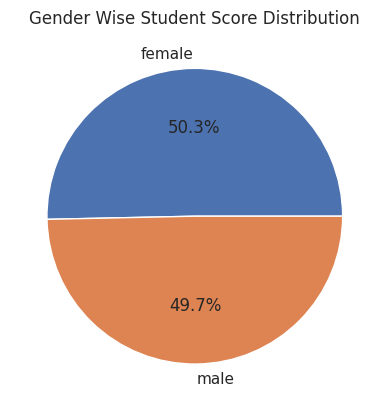

In [89]:
pd.crosstab(df['MathScore'], df['Gender']).mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Wise Student Score Distribution')
plt.show()

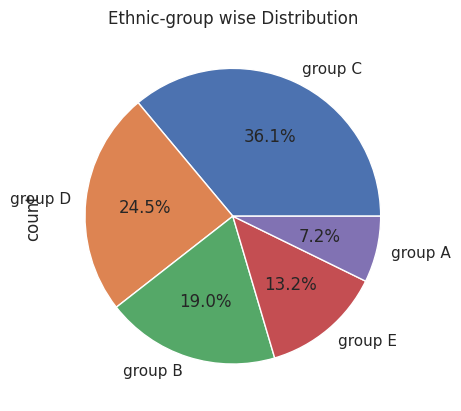

In [40]:
df['EthnicGroup'].value_counts().plot.pie(autopct='%1.1f%%', title = 'Ethnic-group wise Distribution')
plt.show()

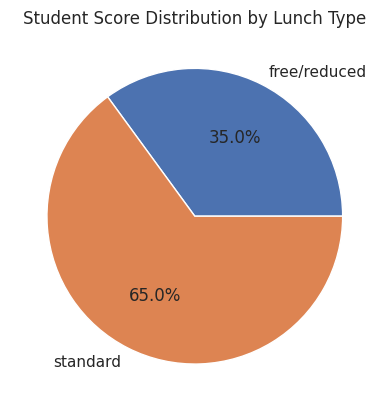

In [93]:
pd.crosstab(df['MathScore'], df['LunchType']).mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Student Score Distribution by Lunch Type')
plt.show()

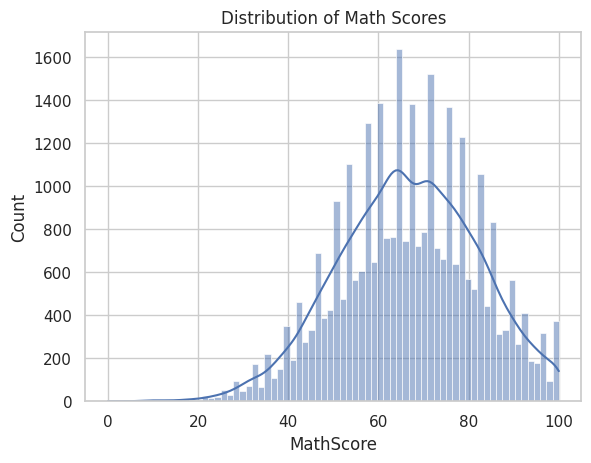

In [114]:
sns.histplot(df['MathScore'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

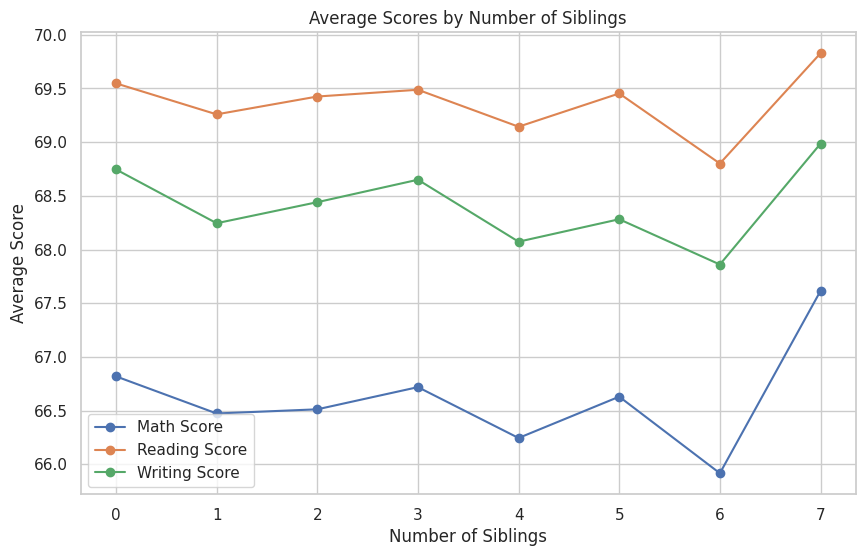

In [104]:

grouped_data = df.groupby('NrSiblings')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['NrSiblings'], grouped_data['MathScore'], label='Math Score', marker='o')
plt.plot(grouped_data['NrSiblings'], grouped_data['ReadingScore'], label='Reading Score', marker='o')
plt.plot(grouped_data['NrSiblings'], grouped_data['WritingScore'], label='Writing Score', marker='o')
plt.xlabel('Number of Siblings')
plt.ylabel('Average Score')
plt.title('Average Scores by Number of Siblings')
plt.legend()
plt.grid(True)
plt.show()

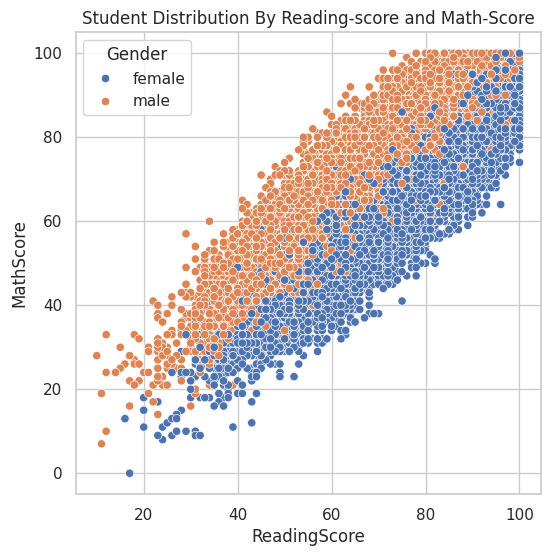

In [63]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x = 'ReadingScore', y = 'MathScore', hue='Gender')
plt.title('Student Distribution By Reading-score and Math-Score')
plt.show()

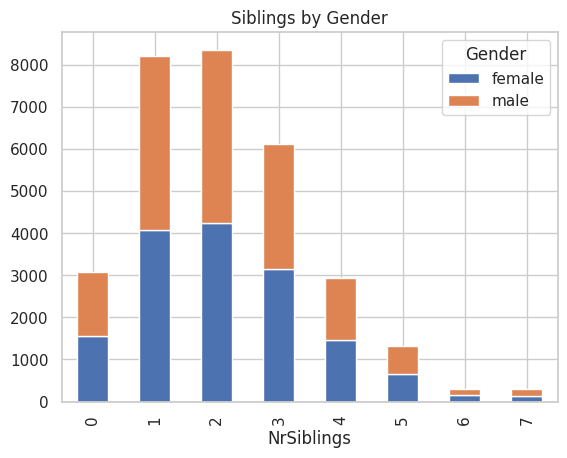

In [78]:
pd.crosstab(df['NrSiblings'], df['Gender']).plot(kind='bar', stacked = True)
plt.title('Siblings by Gender')
plt.show()

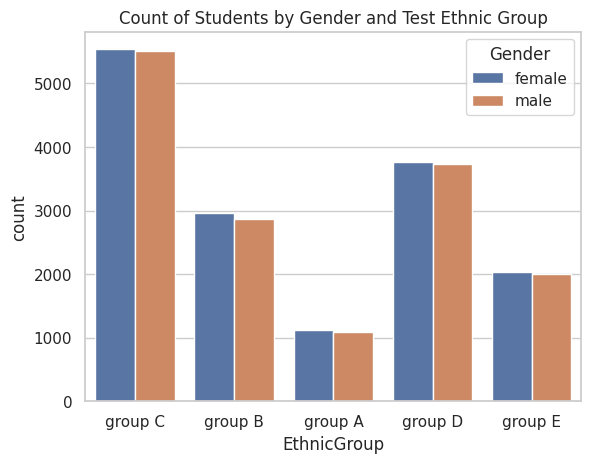

In [48]:
sns.countplot(data=df, x = 'EthnicGroup', hue='Gender')
plt.title('Count of Students by Gender and Test Ethnic Group')
plt.show()

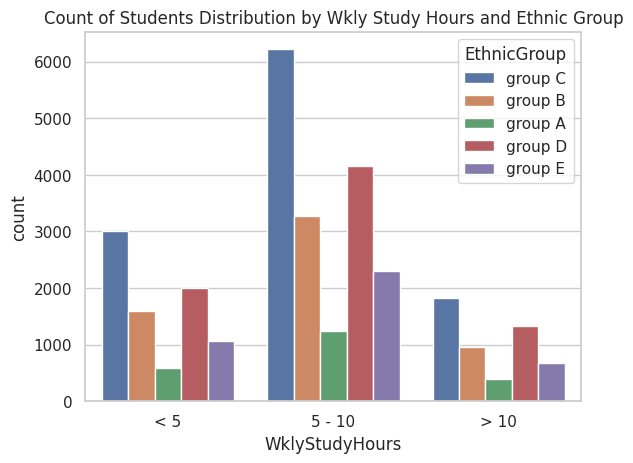

In [49]:
sns.countplot(data=df, x='WklyStudyHours', hue='EthnicGroup')
plt.title('Count of Students Distribution by Wkly Study Hours and Ethnic Group')
plt.show()

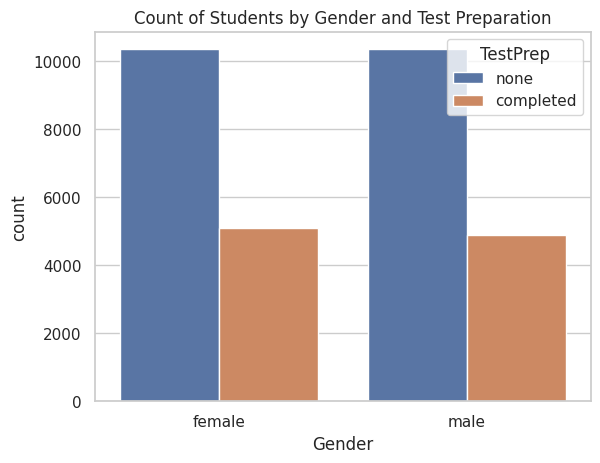

In [28]:
sns.countplot(x='Gender', hue='TestPrep', data=df)
plt.title('Count of Students by Gender and Test Preparation')
plt.show()

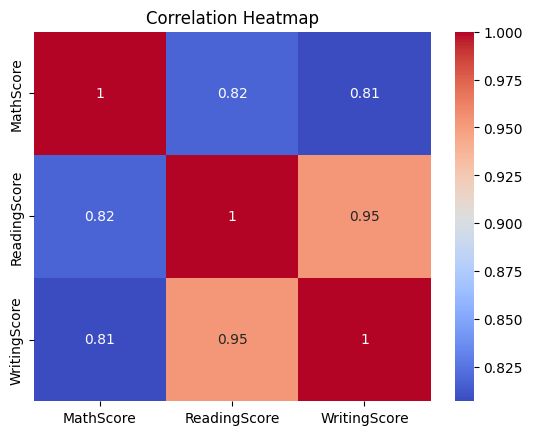

In [18]:
sns.heatmap(df[['MathScore', 'ReadingScore', 'WritingScore']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

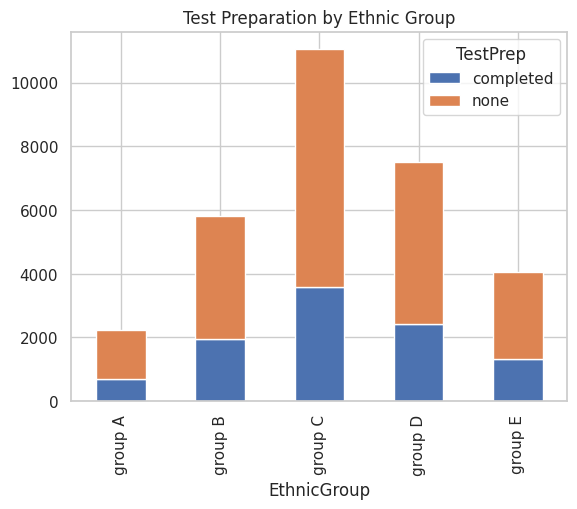

In [31]:
pd.crosstab(df['EthnicGroup'], df['TestPrep']).plot(kind='bar', stacked=True)
plt.title('Test Preparation by Ethnic Group')
plt.show()

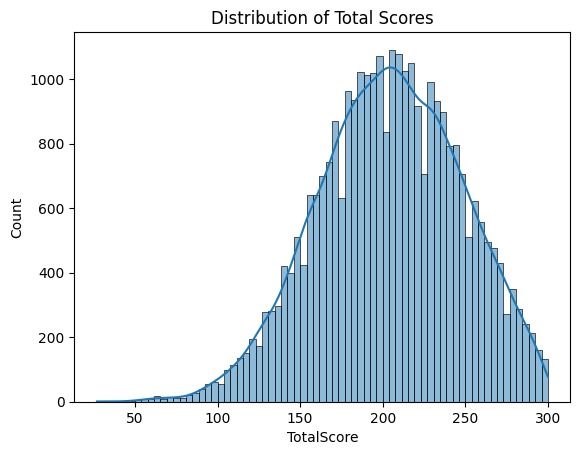

In [21]:
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
sns.histplot(df['TotalScore'], kde=True)
plt.title('Distribution of Total Scores')
plt.show()

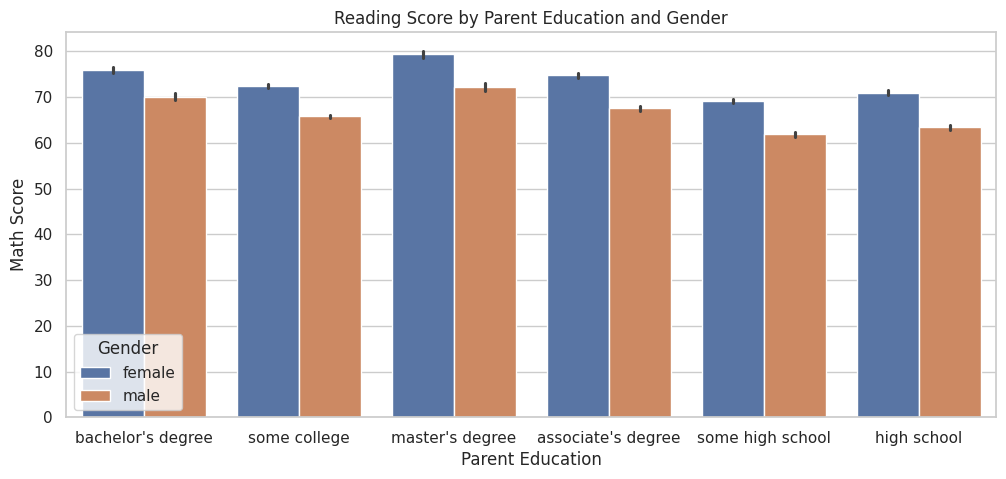

In [113]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='ParentEduc', y='ReadingScore', hue='Gender')
plt.xlabel('Parent Education')
plt.ylabel('Math Score')
plt.title('Reading Score by Parent Education and Gender')
plt.legend(title='Gender')

## Conclusions for Each Problem Statement in Student Performance EDA
### 1. What are the key factors influencing students' academic performance?

#### Study hours, parental education, and test preparation courses have a strong positive correlation with student grades.
#### Students who regularly complete homework and revise consistently tend to achieve higher scores.
#### Attendance and classroom engagement also play a significant role in academic success.
### 2. How do socio-economic factors affect students' performance?
#### Students from families with higher parental education levels and financial stability generally perform better.
#### Access to educational resources (books, internet, tutoring) enhances academic outcomes.
#### Students from lower-income families may face more challenges, leading to lower performance in subjects like Mathematics and Science.

### 3. What is the relationship between study time, extracurricular activities, and academic success?
#### Moderate study time (2-3 hours per day) is optimal for academic success. Overstudying (6+ hours) may lead to burnout, while very low study time (<1 hour) results in poor performance.
#### Participation in extracurricular activities (sports, music, clubs) has a neutral or positive impact on performance, depending on time management.
#### Students who balance academics with hobbies and social life tend to have higher cognitive skills and better overall grades.
### 4. Are there significant differences in performance based on gender or school type?
#### Female students generally perform better in language-based subjects (e.g., English, Social Sciences), while male students often excel in STEM subjects (Math, Physics).

#### Private school students tend to score higher due to better resources, teacher support, and learning environments.

#### Public school students may have lower performance due to larger class sizes and fewer personalized learning opportunities.
